In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력

import seaborn as sns

# 그래프 설정 한글폰트
mpl.rc('font', family = 'Malgun Gothic')
    
# 그래프의 한글을 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수값 나올 때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

In [5]:
df_fitness = pd.read_csv('C:/Users/black/Downloads/솔트룩스/data/health.csv', encoding = 'cp949')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [7]:
df_currency = pd.read_csv('C:/Users/black/Downloads/솔트룩스/data/exchange.csv',parse_dates = ['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


<AxesSubplot:>

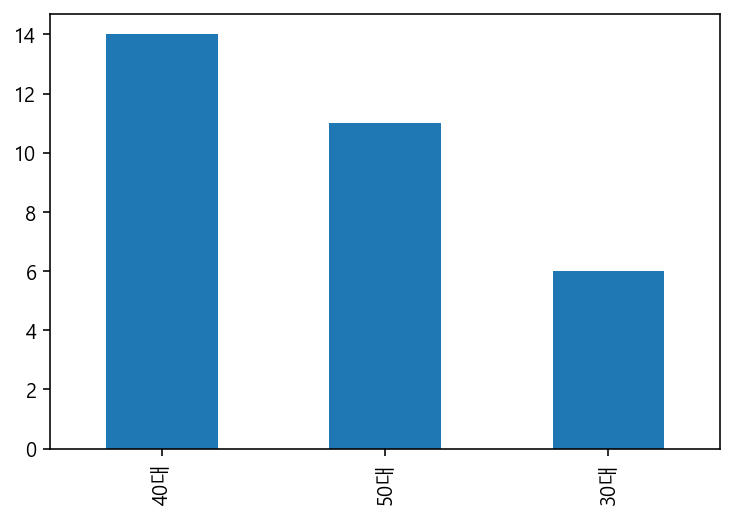

In [11]:
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.plot.bar()

In [19]:
df_groupby_total = df_fitness.groupby(['GENDER','AGEGROUP'],as_index = False)['WEIGHT'].agg('count')
df_pivot = df_groupby_total.pivot('AGEGROUP','GENDER','WEIGHT')

<AxesSubplot:ylabel='AGEGROUP'>

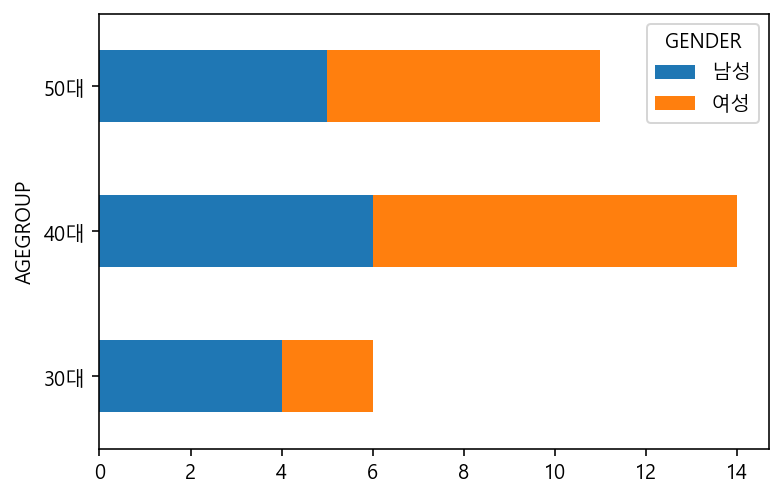

In [21]:
df_pivot.plot(kind = 'barh',stacked = True)

In [25]:
df_ = pd.pivot_table(data = df_currency, index = 'APPL_DATE', columns = 'CURRENCY', values = "STD_RATE")
df_

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0
...,...,...,...
2016-03-27,179.45,1032.23,1169.0
2016-03-28,179.41,1031.46,1169.0
2016-03-29,179.18,1024.65,1162.0


<AxesSubplot:xlabel='APPL_DATE'>

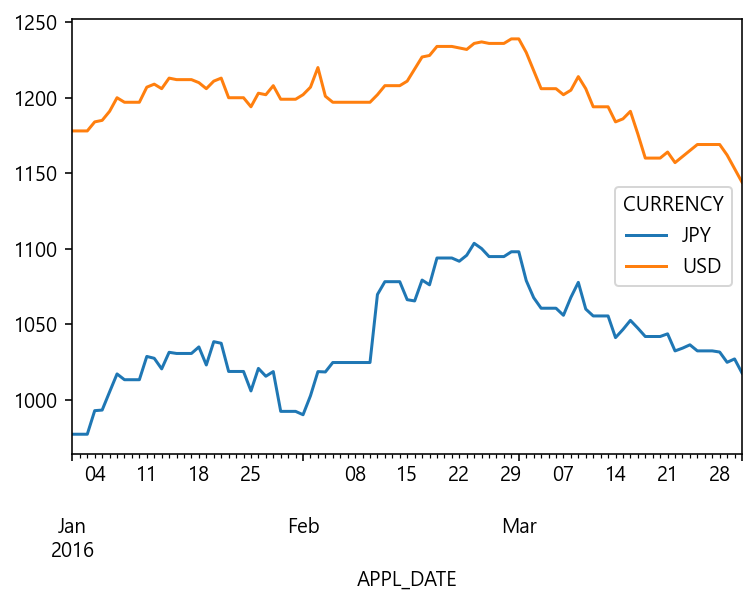

In [28]:
df_[['JPY','USD']].plot()

In [31]:
df_

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0
...,...,...,...
2016-03-27,179.45,1032.23,1169.0
2016-03-28,179.41,1031.46,1169.0
2016-03-29,179.18,1024.65,1162.0


<AxesSubplot:xlabel='APPL_DATE', ylabel='STD_RATE'>

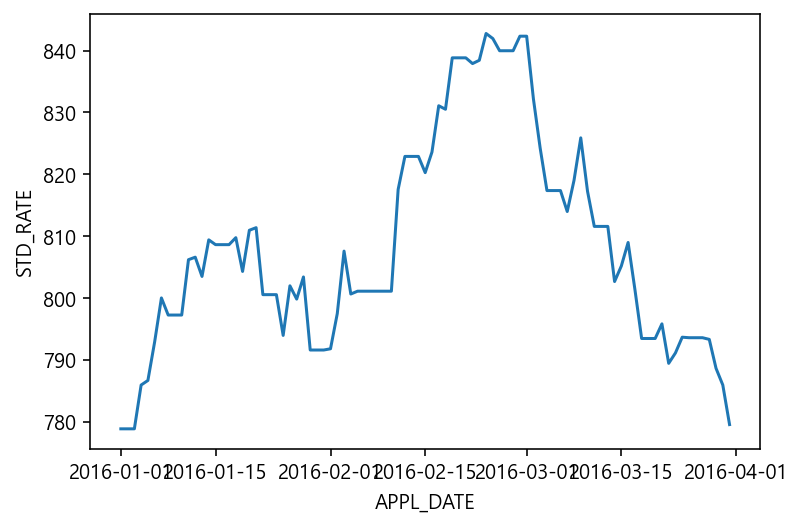

In [39]:
sns.lineplot(data = df_currency, x = "APPL_DATE", y = "STD_RATE", ci = None)

<AxesSubplot:xlabel='APPL_DATE', ylabel='STD_RATE'>

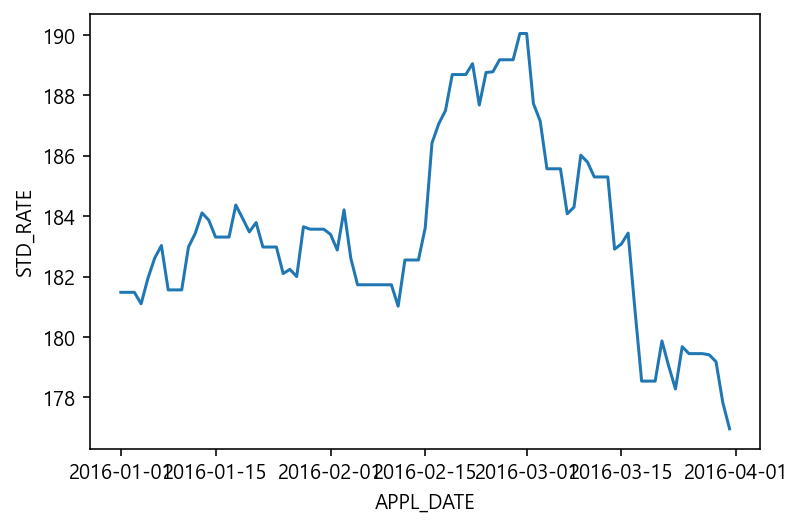

In [40]:
sns.lineplot(data = df_currency[df_currency['CURRENCY'] == 'CNY'], x = "APPL_DATE", y = "STD_RATE", ci = None)

<AxesSubplot:xlabel='APPL_DATE', ylabel='STD_RATE'>

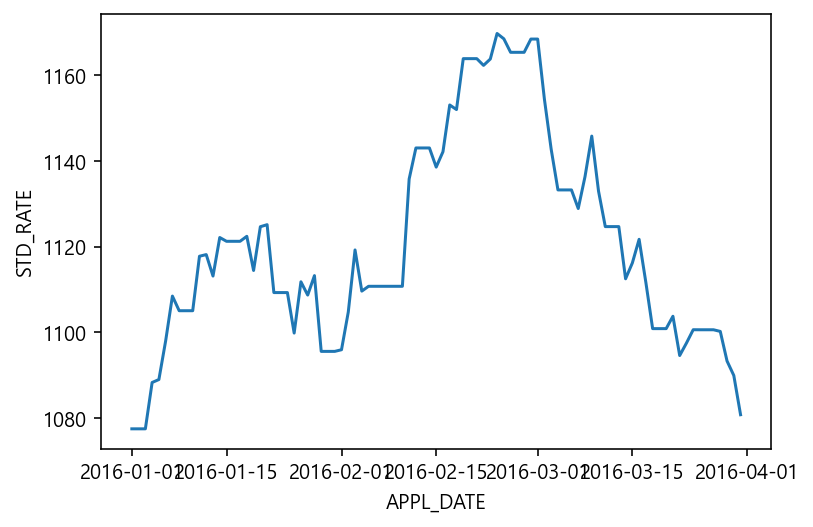

In [41]:
sns.lineplot(data = df_currency[df_currency['CURRENCY'] != 'CNY'], x = "APPL_DATE", y = "STD_RATE", ci = None)

<AxesSubplot:xlabel='APPL_DATE'>

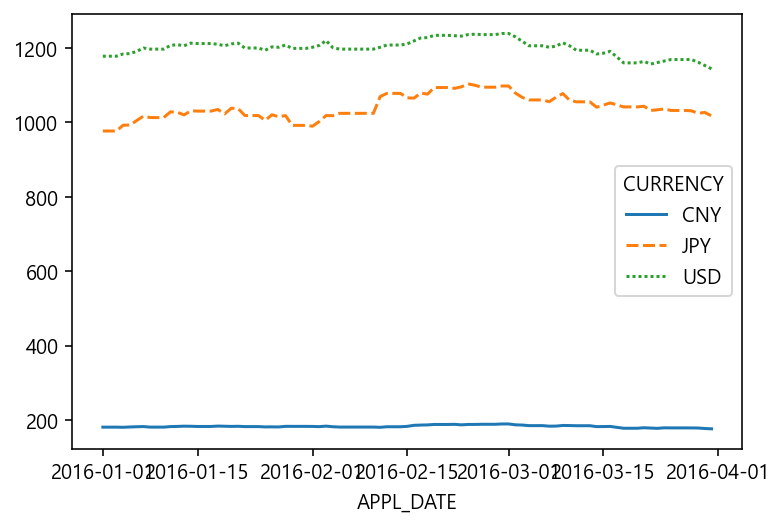

In [35]:
sns.lineplot(data = df_)

<AxesSubplot:xlabel='APPL_DATE', ylabel='CNY'>

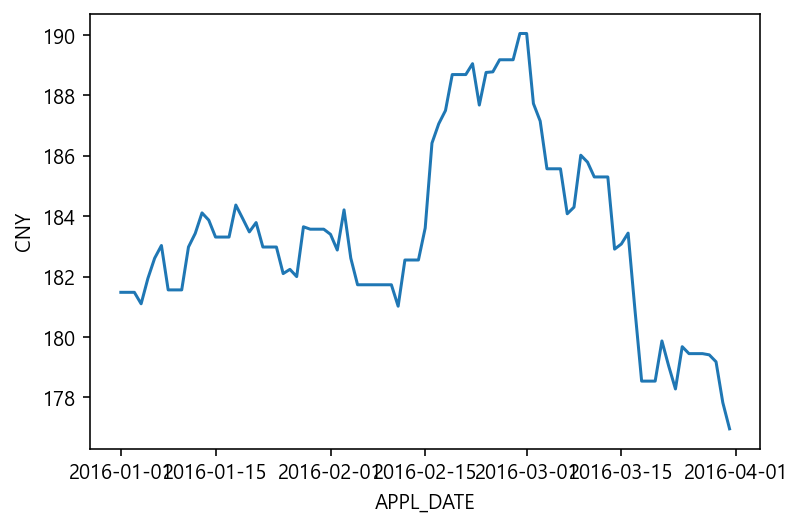

In [36]:
sns.lineplot(data = df_['CNY'])

<AxesSubplot:xlabel='APPL_DATE'>

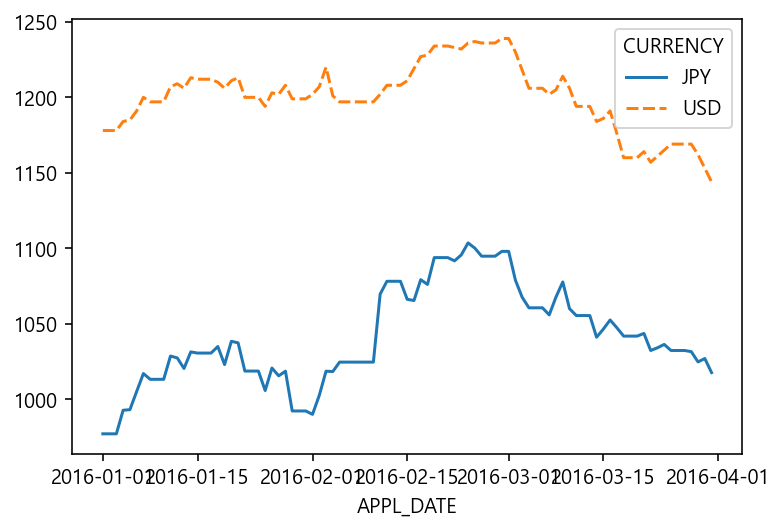

In [37]:
sns.lineplot(data = df_[['JPY','USD']])

In [42]:
df_fitness.corr()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
AGE,1.000000,-0.264408,-0.249929,0.133988,-0.333892,-0.183458,-0.381818
WEIGHT,-0.264408,1.000000,-0.162753,0.143508,0.181516,0.043974,0.249381
OXY,-0.249929,-0.162753,1.000000,-0.862195,-0.397974,-0.399356,-0.236740
RUNTIME,0.133988,0.143508,-0.862195,1.000000,0.313648,0.450383,0.226103
RUNPULSE,-0.333892,0.181516,-0.397974,0.313648,1.000000,0.352461,0.929754
RSTPULSE,-0.183458,0.043974,-0.399356,0.450383,0.352461,1.000000,0.305124
MAXPULSE,-0.381818,0.249381,-0.236740,0.226103,0.929754,0.305124,1.000000


In [48]:
df = pd.pivot_table(data = df_fitness, index = "GENDER", columns = "AGEGROUP", values = "OXY",aggfunc = "mean")
df

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

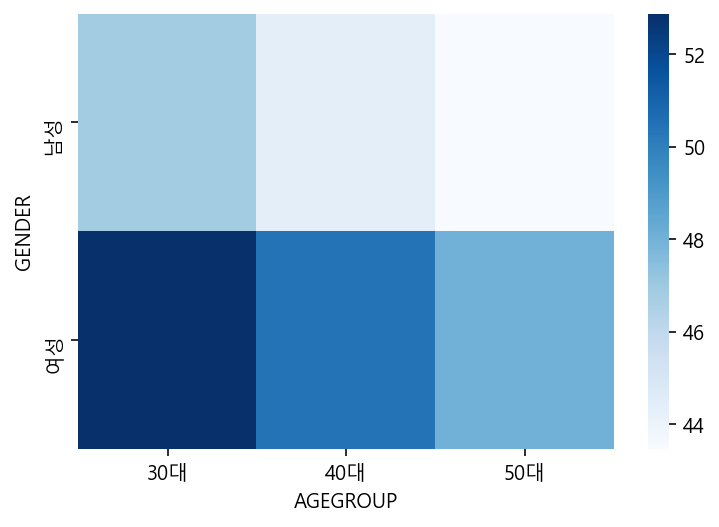

In [49]:
sns.heatmap(data = df, cmap = "Blues")